In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
#hyper parameters
input_size=784 #28x28 which will get flattened
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

torch.Size([100, 1, 28, 28])


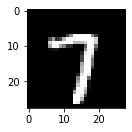

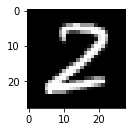

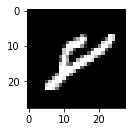

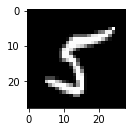

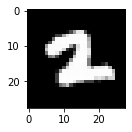

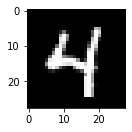

In [15]:
#Dataset, MNIST (Some handwritten numbers)
train_dataset = torchvision.datasets.MNIST(root='./data', train = True,
                                          transform=transform.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train = False,
                                          transform=transform.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size,
                                           shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()

#print(examples.next())
print(samples.shape)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
    plt.show()

In [5]:
class NeuralNet(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [9]:
model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
    

epoch 1 / 2, step 100/600, loss = 0.4759
epoch 1 / 2, step 200/600, loss = 0.3816
epoch 1 / 2, step 300/600, loss = 0.2637
epoch 1 / 2, step 400/600, loss = 0.1446
epoch 1 / 2, step 500/600, loss = 0.2520
epoch 1 / 2, step 600/600, loss = 0.2250
epoch 2 / 2, step 100/600, loss = 0.1660
epoch 2 / 2, step 200/600, loss = 0.1189
epoch 2 / 2, step 300/600, loss = 0.1166
epoch 2 / 2, step 400/600, loss = 0.2588
epoch 2 / 2, step 500/600, loss = 0.1680
epoch 2 / 2, step 600/600, loss = 0.1355


In [11]:
#test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels, in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100 * n_correct / n_samples
    print(f'accuracy = {acc:.4f}')

accuracy = 95.3600
